<a href="https://colab.research.google.com/github/PoojithaYarava/DATA-MINING/blob/main/Lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Load and Visualize the Data

Download the dataset: Use Salary_Data.csv (or generate synthetic data).
Load the dataset using pandas.read_csv().
Visualize the relationship between features and target variables using matplotlib.

In [4]:
import numpy as np
import pandas as pd

# Generate random data for Years of Experience
experience = np.random.uniform(low=0, high=15, size=(100,))

# Generate random data for Salary based on experience (with some noise)
salary = 5000 + 2500 * experience + np.random.normal(scale=1000, size=(100,))

# Create a Pandas DataFrame
data = pd.DataFrame({'YearsExperience': experience, 'Salary': salary})

# Save the DataFrame to a CSV file
data.to_csv('Salary_Data.csv', index=False)

In [5]:
import pandas as pd

data = pd.read_csv('Salary_Data.csv')

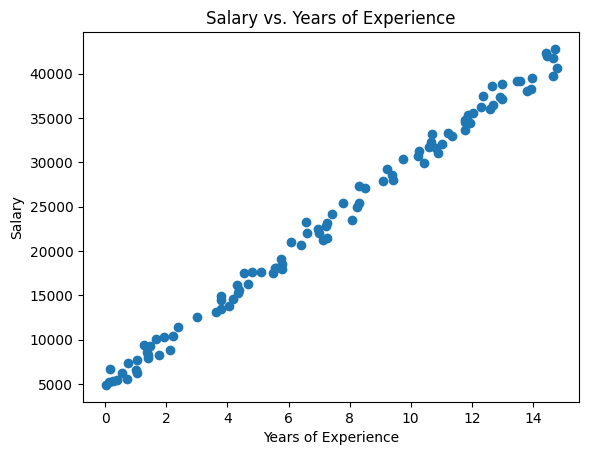

In [6]:
import matplotlib.pyplot as plt

plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')
plt.show()

Task 2: Apply Polynomial Regression
1. Preprocess the data
o Extract the independent (X) and dependent (y) variables.
o Reshape X if necessary.
2. Convert features to polynomial features using PolynomialFeatures.
3. Train a polynomial regression model using LinearRegression

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
x=data['YearsExperience'].values.reshape(-1,1)
# The column name is case-sensitive. Change 'salary' to 'Salary'
y=data['Salary']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=2)  # You can change the degree as needed
# Use x_train instead of X_train
X_train_poly = poly_features.fit_transform(x_train)
X_test_poly = poly_features.transform(x_test) # Only transform, no fitting for test data

In [14]:
# Create and train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

Task 3: Evaluate and Visualize
1. Make predictions using the trained model.
2. Evaluate model performance using metrics like:
o Mean Squared Error (MSE)
o R² Score
3. Plot the polynomial regression curve with original data.


In [15]:
# Make predictions on the testing data
y_pred = model.predict(X_test_poly)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 673365.1649010938
R-squared (R²): 0.9943221901116788


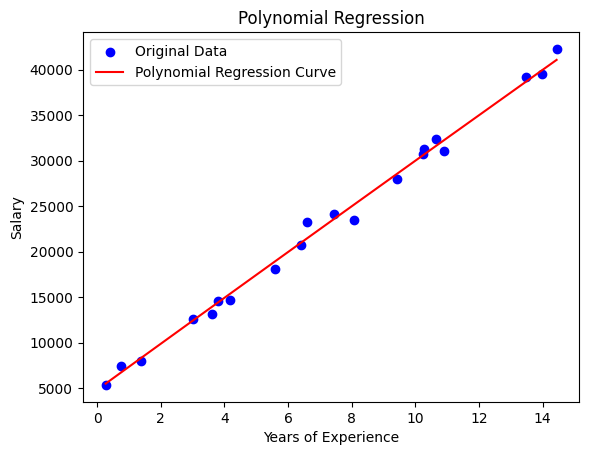

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Assuming 'data', 'poly_features', and 'model' are already defined

# Extract features and target
x = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Sort the data points for smoother plotting
X_plot = np.sort(x_test, axis=0)  # Use x_test instead of X_test
y_plot = model.predict(poly_features.transform(X_plot))

# Plot the original data points
plt.scatter(x_test, y_test, color='blue', label='Original Data')  # Use x_test

# Plot the polynomial regression curve
plt.plot(X_plot, y_plot, color='red', label='Polynomial Regression Curve')

# Add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression')

# Display the legend
plt.legend()

# Show the plot
plt.show()